This notebook goes into more detail about the structure of the SAM object and and its attributes.

In [1]:
import matplotlib.pyplot as plt
from SAM import SAM
import numpy as np
import pandas as pd

%matplotlib inline

All Python objects have a `.__dict__` dictionary, which stores all their attributes. We use this to peek at the organization of data structures within the SAM object.

Initializing SAM with an empty constructur, its only attributes are `run_args` and `preprocess_args`. These are dictionaries that will contain all the parameters used for data preprocessing and running SAM:

In [2]:
sam=SAM()
sam.__dict__

{'run_args': {}, 'preprocess_args': {}}

After loading in data, we can see two new attributes: `adata_raw` and `adata`, both `AnnData` objects. `adata_raw` is the data loaded from the file and will remain unchanged. `adata` is initialy set to be a copy of `adata_raw` and will contain the preprocessed data as well as the results of the SAM analysis.

In [3]:
sam.load_data('../../example_data/schisto2.5_tpm.csv.gz')
sam.__dict__

{'run_args': {},
 'preprocess_args': {},
 'adata_raw': AnnData object with n_obs × n_vars = 338 × 10782 ,
 'adata': AnnData object with n_obs × n_vars = 338 × 10782 
     layers: 'X_disp'}

Upon preprocessing the data, the `preprocess_args` dictionary is populated with the parameters used. We can also see new entries in the `sam.adata` object. The `sam.adata_raw` object stays the same. Every time `preprocess_data` is called, `adata_raw` is used to reset `adata` back to the original expression values prior to preprocessing, allowing one to try different preprocessing parameters without needing to reload the data each time. 

In [4]:
sam.preprocess_data()
sam.__dict__

{'run_args': {},
 'preprocess_args': {'div': 1,
  'downsample': 0,
  'sum_norm': None,
  'include_genes': None,
  'exclude_genes': None,
  'norm': 'log',
  'min_expression': 1,
  'thresh': 0.01,
  'filter_genes': True},
 'adata_raw': AnnData object with n_obs × n_vars = 338 × 10782 ,
 'adata': AnnData object with n_obs × n_vars = 338 × 10782 
     var: 'mask_genes'
     uns: 'preprocess_args'
     layers: 'X_disp'}

After running SAM, even more entries containing the SAM outputs appear in `sam.adata`:

In [5]:
sam.run()
sam.__dict__

RUNNING SAM
Iteration: 0, Convergence: 0.44226679709776406
Iteration: 1, Convergence: 0.11819734666338919
Iteration: 2, Convergence: 0.0710561796558335
Iteration: 3, Convergence: 0.021059766593243306
Iteration: 4, Convergence: 0.0082287522417829
Computing the UMAP embedding...
Elapsed time: 9.04056167602539 seconds


{'run_args': {'max_iter': 10,
  'verbose': True,
  'projection': 'umap',
  'stopping_condition': 0.005,
  'num_norm_avg': 50,
  'k': 20,
  'distance': 'correlation',
  'preprocessing': 'Normalizer',
  'npcs': None,
  'n_genes': None,
  'weight_PCs': True,
  'proj_kwargs': {}},
 'preprocess_args': {'div': 1,
  'downsample': 0,
  'sum_norm': None,
  'include_genes': None,
  'exclude_genes': None,
  'norm': 'log',
  'min_expression': 1,
  'thresh': 0.01,
  'filter_genes': True},
 'adata_raw': AnnData object with n_obs × n_vars = 338 × 10782 ,
 'adata': AnnData object with n_obs × n_vars = 338 × 10782 
     var: 'mask_genes', 'spatial_dispersions', 'weights'
     uns: 'preprocess_args', 'ranked_genes', 'pca_obj', 'X_processed', 'neighbors', 'run_args'
     obsm: 'X_pca', 'X_umap'
     layers: 'X_disp', 'X_knn_avg'}

As mentioned previously, preprocessing the data again resets `adata` to be equal to `adata_raw` prior to preprocessing. Thus, all the SAM outputs we saw in `adata` previously are cleared.

In [6]:
sam.preprocess_data()
sam.__dict__

{'run_args': {'max_iter': 10,
  'verbose': True,
  'projection': 'umap',
  'stopping_condition': 0.005,
  'num_norm_avg': 50,
  'k': 20,
  'distance': 'correlation',
  'preprocessing': 'Normalizer',
  'npcs': None,
  'n_genes': None,
  'weight_PCs': True,
  'proj_kwargs': {}},
 'preprocess_args': {'div': 1,
  'downsample': 0,
  'sum_norm': None,
  'include_genes': None,
  'exclude_genes': None,
  'norm': 'log',
  'min_expression': 1,
  'thresh': 0.01,
  'filter_genes': True},
 'adata_raw': AnnData object with n_obs × n_vars = 338 × 10782 ,
 'adata': AnnData object with n_obs × n_vars = 338 × 10782 
     var: 'mask_genes'
     uns: 'preprocess_args'
     layers: 'X_disp'}

# A deeper look inside AnnData objects

For more details about AnnData objects, please see its documentation: https://anndata.readthedocs.io/en/latest/anndata.AnnData.html

Here, I briefly summarize the structure of AnnData objects and how they store the results of the SAM analysis. Below, I run SAM again, and perform density clustering and k-means clustering.

In [7]:
sam.run()
sam.clustering(method = 'dbscan')
sam.clustering(param = 4, method = 'kmeans')
sam.adata

RUNNING SAM
Iteration: 0, Convergence: 0.44618944192275617
Iteration: 1, Convergence: 0.11926473141022714
Iteration: 2, Convergence: 0.072751141507783
Iteration: 3, Convergence: 0.02219644847326666
Iteration: 4, Convergence: 0.00783465644132098
Computing the UMAP embedding...
Elapsed time: 3.10772967338562 seconds


AnnData object with n_obs × n_vars = 338 × 10782 
    obs: 'density_clusters', 'kmeans_clusters'
    var: 'mask_genes', 'spatial_dispersions', 'weights'
    uns: 'preprocess_args', 'ranked_genes', 'pca_obj', 'X_processed', 'neighbors', 'run_args'
    obsm: 'X_pca', 'X_umap'
    layers: 'X_disp', 'X_knn_avg'

## AnnData 'obs'

`adata.obs` is a Pandas DataFrame containing loaded labels for each cell. Columns correspond different types of labels, and rows correspond to cells. For example, we currently have two columns in this DataFrame: density_clusters and kmeans_clusters. These are the cluster assignments we computed above.

The annotations loaded using the `sam.load_annotations` function are also stored in `adata.obs`.

In [8]:
sam.adata.obs.head()

,density_clusters,kmeans_clusters
N402Barcode_706-511,0,3
N402Barcode_705-507,0,0
N402Barcode_718-520,1,1
N402Barcode_722-516,0,0
N402Barcode_721-516,0,3


`adata.obs` can be manipulated / accessed just like any other PandasDataFrame. For example, let's say you had some new information you wanted to store inside `adata.obs`. For example, I want to annotate cells 'N402Barcode_706-511' and 'N402Barcode_721-516' with the label 'alpha'. I would do this in the following way:

In [9]:
new_annotation = pd.Series( data = ['alpha' , 'alpha'] , index = ['N402Barcode_706-511','N402Barcode_721-516'])
sam.adata.obs['new_annotation'] = new_annotation
sam.adata.obs.head()

,density_clusters,kmeans_clusters,new_annotation
N402Barcode_706-511,0,3,alpha
N402Barcode_705-507,0,0,NaN
N402Barcode_718-520,1,1,NaN
N402Barcode_722-516,0,0,NaN
N402Barcode_721-516,0,3,alpha


We now have a new key/column in `adata.obs`. Cells we did not specify with a label in the new 'new_annotation' column of `adata.obs` receive `NaN`s. 

In [10]:
print(list(sam.adata.obs.keys()))
# or
print(list(sam.adata.obs.columns))

['density_clusters', 'kmeans_clusters', 'new_annotation']
['density_clusters', 'kmeans_clusters', 'new_annotation']


## AnnData 'var'

`adata.var` is also a Pandas DataFrame and behaves in the same way as `adata.obs`, except it stores information about genes as opposed to cells. After running SAM, `adata.var` is already populated with the following entries:

In [11]:
print(list(sam.adata.var.keys()))

['mask_genes', 'spatial_dispersions', 'weights']


'mask_genes' is a boolean vector of genes that passed the filtering step in `preprocess_data`. `False` indicates genes that were filtered out (their expressions were zero'd out).

'spatial_dispersions' is a vector containing the spatial dispersion for each gene along the final graph manifold computed by SAM. 

'weights' is a vector containing the SAM weights for each gene (essentially a normalized version of 'spatial_dispersions').

In [12]:
sam.adata.var.head()

,mask_genes,spatial_dispersions,weights
Smp_000020,True,0.155400,0.284002
Smp_000030,True,0.042244,0.148074
Smp_000040,True,0.143045,0.272478
Smp_000050,False,0.000000,0.000000
Smp_000070,True,0.121614,0.251240


In [13]:
#To get the gene weights:
sam.adata.var['weights'].head()
# convert to a numpy array by: np.array(sam.adata.var['weights'])

Smp_000020    0.284002
Smp_000030    0.148074
Smp_000040    0.272478
Smp_000050    0.000000
Smp_000070    0.251240
Name: weights, dtype: float64

## AnnData 'uns'

The `adata.uns` attribute contains unstructured data types output by SAM. It is a dictionary:

In [14]:
print(type(sam.adata.uns))
print(list(sam.adata.uns.keys()))

<class 'collections.OrderedDict'>
['preprocess_args', 'ranked_genes', 'pca_obj', 'X_processed', 'neighbors', 'run_args']


After running SAM, `uns` contains:

the preprocessing parameters and run parameters dictionaries (`preprocess_args` and `run_args`).

`ranked_genes` - a list of genes ordered by their SAM weights (in descending order)

`pca_obj` - the `sklearn.decomposition.PCA` object used for computing the PCA

`neighbors` - a dictionary with key 'connectivities' (to be compatible with scanpy) containing the nearest neighbor graph in sparse matrix format.

`X_processed` - a numpy array containing the fully processed (SAM-weighted, standardized/normalized, etc) data fed into PCA.

## AnnData 'obsm' and 'varm'

`adata.obsm` and `adata.varm` contain multidimensional cell / gene coordinates. For example, `adata.obsm` is where the UMAP projections and principal components are stored:

In [15]:
print(type(sam.adata.obsm))
print(list(sam.adata.obsm.keys()))
print(sam.adata.obsm['X_pca'][:5,:5])
print(sam.adata.obsm['X_umap'][:5,:])

<class 'anndata.core.alignedmapping.AxisArrays'>
['X_pca', 'X_umap']
[[ 0.00157762  0.04337641 -0.01512534 -0.00094726 -0.00185037]
 [-0.01747445  0.04205186  0.00317779 -0.01352714  0.02026357]
 [ 0.0190581  -0.00348738 -0.00723975  0.01363759  0.00069822]
 [ 0.01623623  0.01577638  0.02348912 -0.02137394  0.00838699]
 [ 0.00396984  0.03166649 -0.00798969  0.00284209 -0.01545152]]
[[ 0.39034012 -5.078543  ]
 [ 0.78728646 -4.4592743 ]
 [ 6.4642453   3.3165214 ]
 [ 1.3578447  -3.7025545 ]
 [-0.55239487 -5.5341516 ]]


## AnnData 'X' and 'layers'

Finally, the `adata.X` attribute contains the expression data in sparse matrix format. The `adata.layers` attribute contains different 'versions' of the expression data.

`adata.X` is the sparse matrix used for dimensionality reduction (PCA). 

`adata.layers['X_disp']` is the sparse matrix used for computing the spatial dispersions.

`adata.layers['X_knn_avg']` contain the spatially averaged gene expression values used for computing the spatial dispersions.

In [16]:
print(type(sam.adata.X))
print(type(sam.adata.layers))
print(list(sam.adata.layers.keys()))

<class 'scipy.sparse.csr.csr_matrix'>
<class 'anndata.core.alignedmapping.Layers'>
['X_disp', 'X_knn_avg']


Why am I using `.X` for dimensionality reduction and `.layers['X_disp']` for computing spatial dispersions?

In most cases, `adata.X` is in fact exactly the same as `adata.layers['X_disp']`. However, in cases where you want to regress out certain principal components associated with unwanted sources of variation (like cell cycle effects, see the batch effect correction tutorials), elements of the gene expression matrix might become negative, normalized in various ways, etc. Calculating ratio-based dispersions (like $\frac{variance}{mean}$ on this modified expression data becomes ill-defined.

For example, let's regress out the first principal component in the 3.5-week schistosome dataset:

In [17]:
sam=SAM()
sam.load_data('../../example_data/schisto3.5_tpm.csv.gz')
sam.preprocess_data()
sam.run()

RUNNING SAM
Iteration: 0, Convergence: 0.47589835311705936
Iteration: 1, Convergence: 0.11408144231398536
Iteration: 2, Convergence: 0.06055234954592202
Iteration: 3, Convergence: 0.020579576429924595
Iteration: 4, Convergence: 0.009372476742600418
Iteration: 5, Convergence: 0.005454890354145821
Computing the UMAP embedding...
Elapsed time: 8.060481071472168 seconds


Prior to regression, we can see that `adata.X` = `adata.layers['X_disp']`:

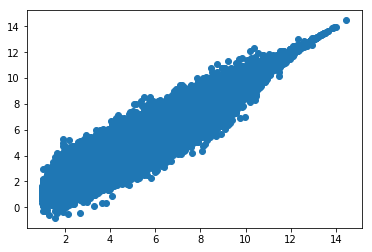

In [22]:
xind,yind = sam.adata.layers['X_disp'].nonzero()
a = sam.adata.layers['X_disp'][xind,yind].A
b = sam.adata.X[xind,yind].A
plt.figure(); plt.scatter(a,b)

In [20]:
sam.calculate_regression_PCs();
sam.regress_genes([0])

After regression, we can see that they are no longer equivalent. `adata.X` contains the regressed data. `adata.layers['X_disp']` contains the original preprocessed gene expression data. 

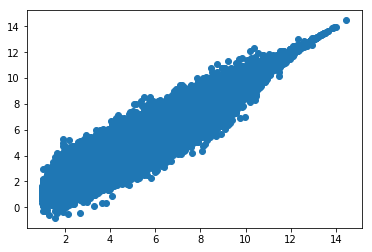

In [21]:
xind,yind = sam.adata.layers['X_disp'].nonzero()
a = sam.adata.layers['X_disp'][xind,yind].A
b = sam.adata.X[xind,yind].A
plt.figure(); plt.scatter(a,b)